In [6]:
#Let's import required packages
import pandas as pd
import numpy as np
#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
# Algorithms
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [111]:
wine=pd.read_csv("winequality-white.csv", sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [112]:
#to know shape of the dataset
wine.shape

(4898, 12)

In [113]:
#Number of unique valuesin this dataset
for col in wine.columns.values:
    print("Number of unique values of {}:{}".format(col,wine[col].nunique()))

Number of unique values of fixed acidity:68
Number of unique values of volatile acidity:125
Number of unique values of citric acid:87
Number of unique values of residual sugar:310
Number of unique values of chlorides:160
Number of unique values of free sulfur dioxide:132
Number of unique values of total sulfur dioxide:251
Number of unique values of density:890
Number of unique values of pH:103
Number of unique values of sulphates:79
Number of unique values of alcohol:103
Number of unique values of quality:7


In [114]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [115]:
wine.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Exploratory Data Analysis

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

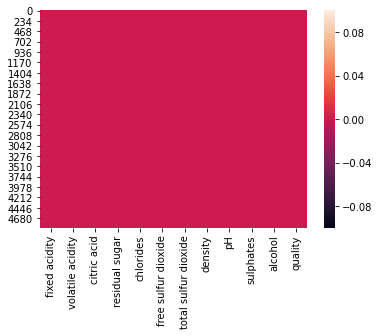

In [116]:
#check for null values
sns.heatmap(wine.isnull())
wine.isnull().sum()

<AxesSubplot:xlabel='quality', ylabel='count'>

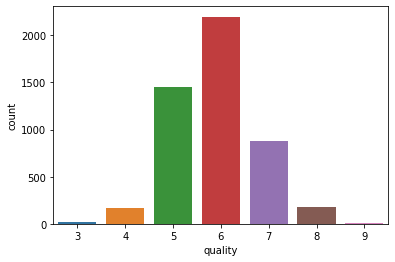

In [117]:
sns.countplot(wine['quality'])

In [118]:
#Let's create bins for to change the level of quaility into two categories
#'Bad' and 'Good'
bins=(2,6.5,8)
group=['Bad','Good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group)#now assign kabels to quality
label_quality=LabelEncoder()#Bad becomes 0,and good becomes 1
wine['quality']=label_quality.fit_transform(wine['quality'])

In [119]:
wine['quality'].value_counts()

0    3838
1    1055
2       5
Name: quality, dtype: int64

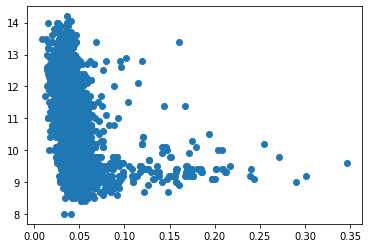

In [120]:
plt.scatter(wine['chlorides'],wine['alcohol'],cmap='orange')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.078483
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.066229
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.034007
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.117293
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.183789
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,-0.023510
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.162258
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.283815
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.094747
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.046534


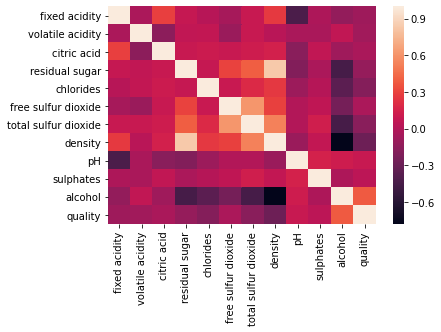

In [121]:
#to check correlation
sns.heatmap(wine.corr())
wine.corr()

In [122]:
#Let's drop pH column from data to remove the multicolinearity
wine.drop('pH',axis=1,inplace=True)

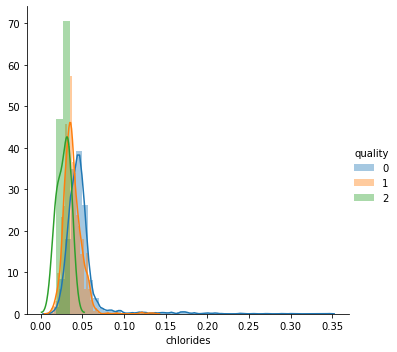

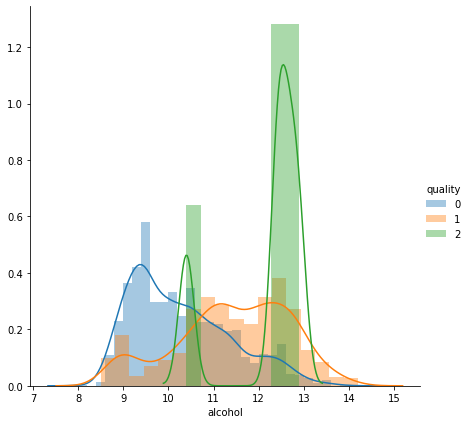

In [123]:
#distribution plots
sns.FacetGrid(wine,hue='quality',size=5).map(sns.distplot,'chlorides').add_legend()
sns.FacetGrid(wine,hue='quality',size=6).map(sns.distplot,'alcohol').add_legend()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

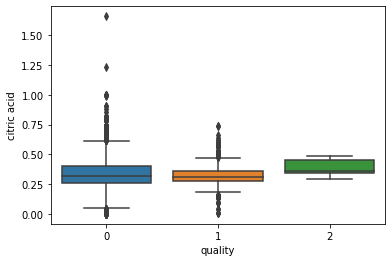

In [124]:
#boxplot for to check outliers
sns.boxplot(x='quality',y='citric acid',data=wine)

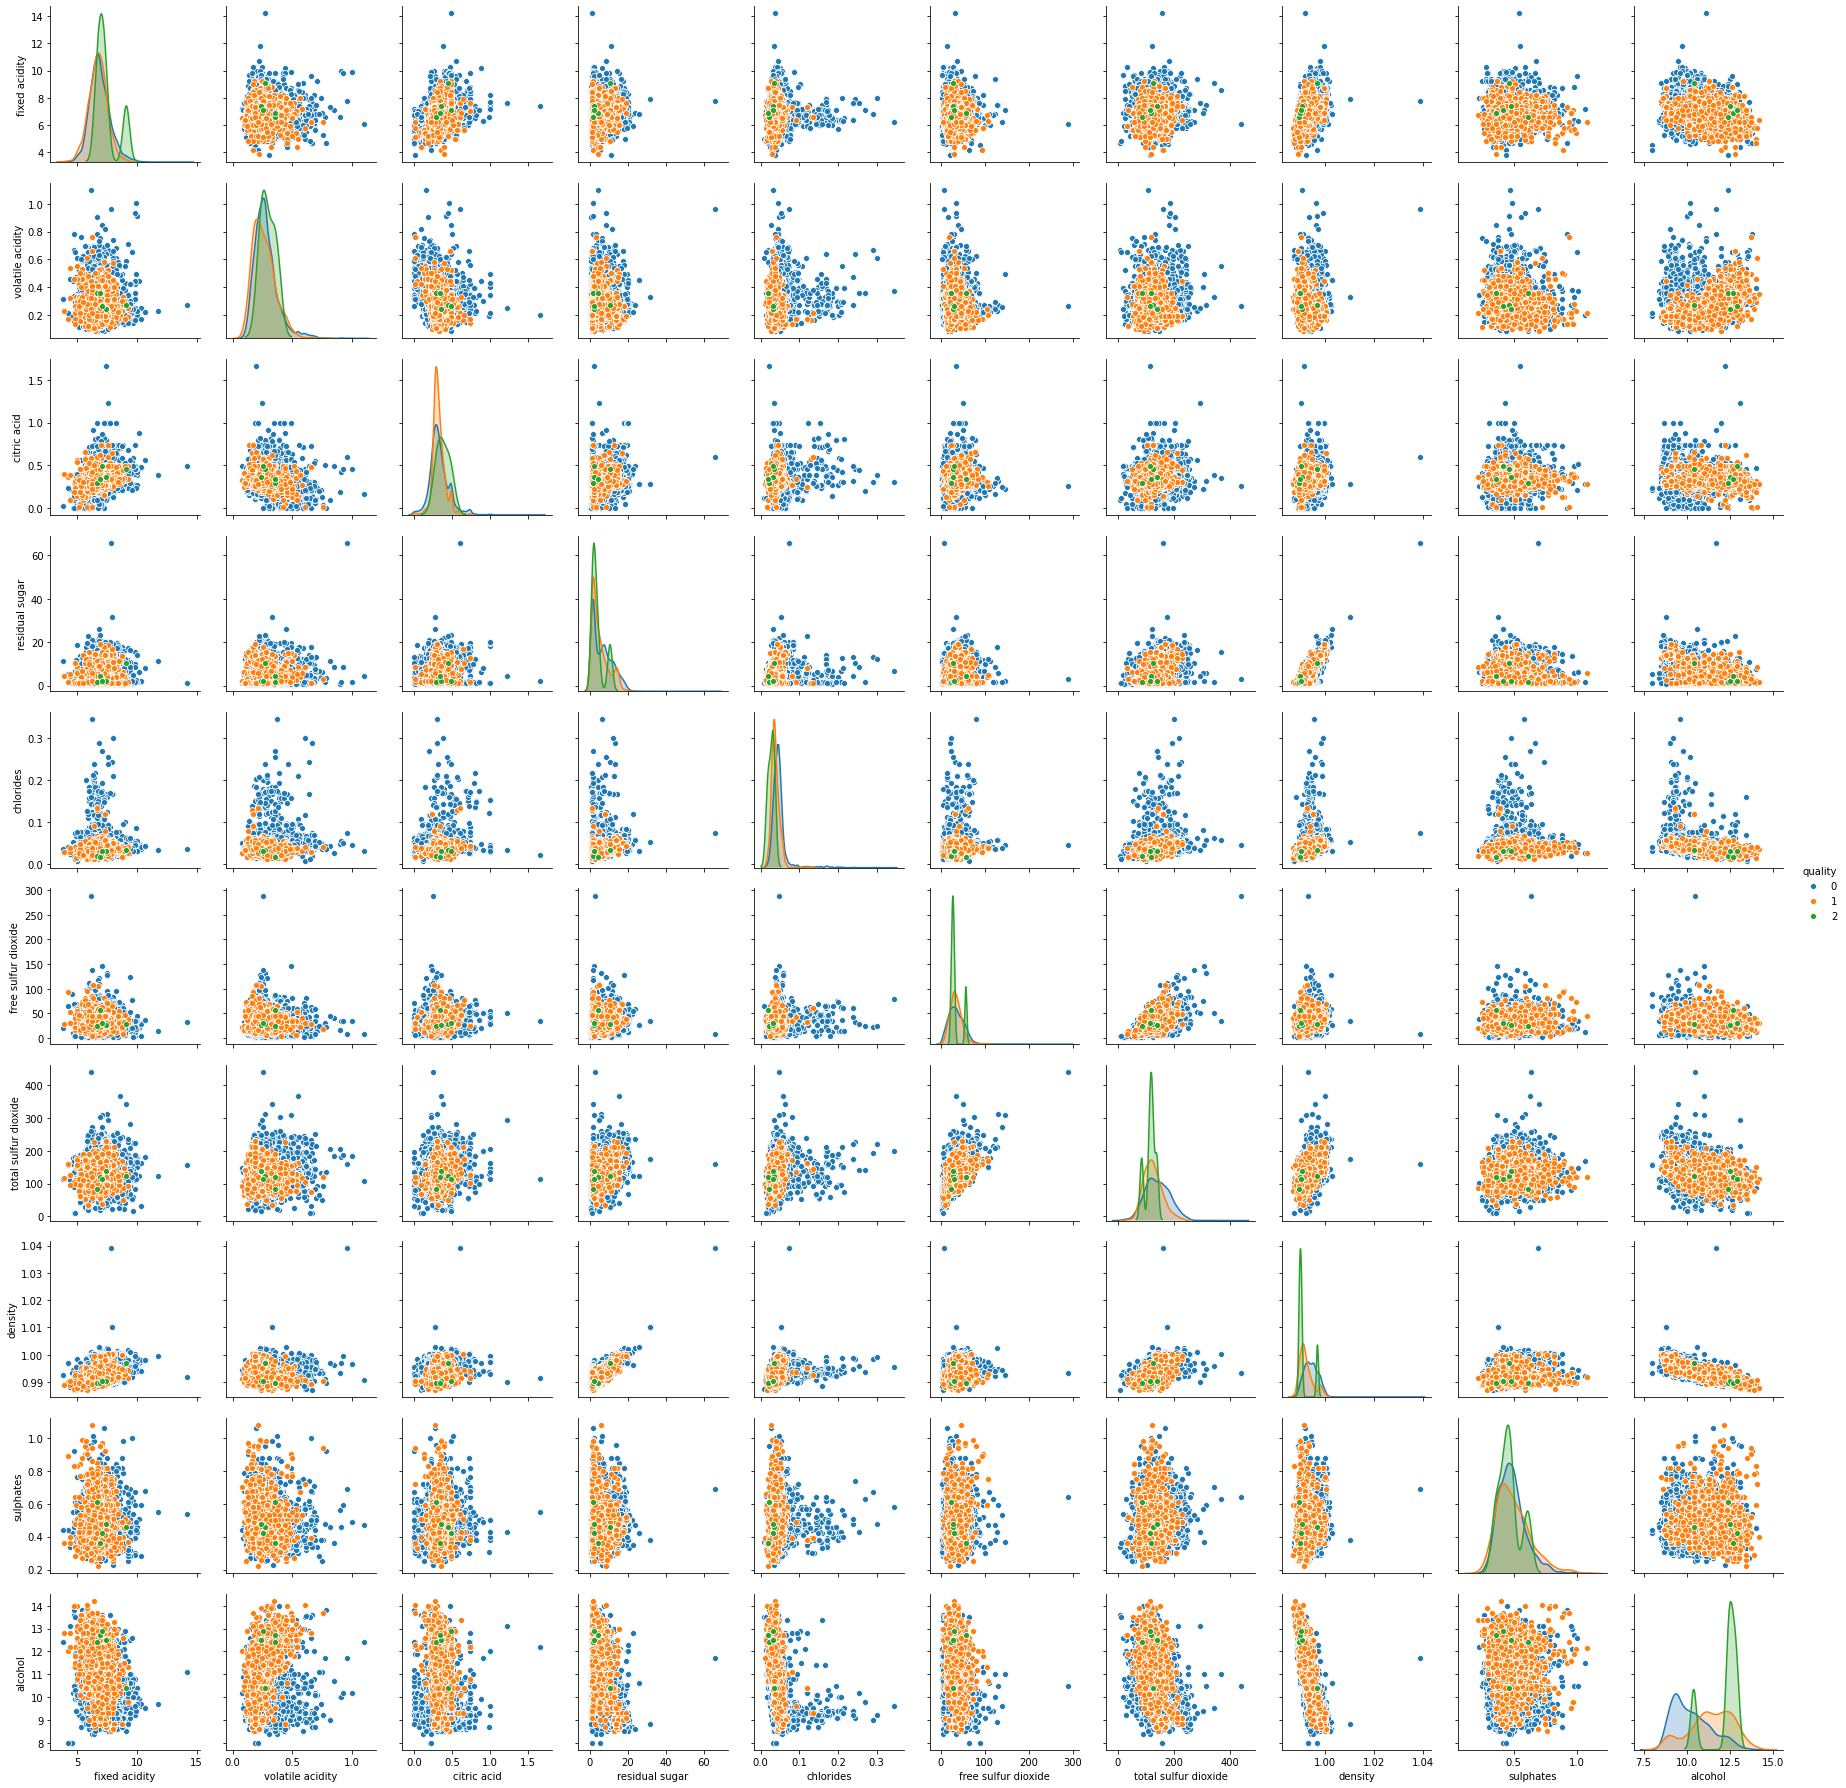

In [125]:
sns.pairplot(wine ,hue ='quality', vars =['fixed acidity','volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'])

# Identification and Removal of Outliers

<AxesSubplot:>

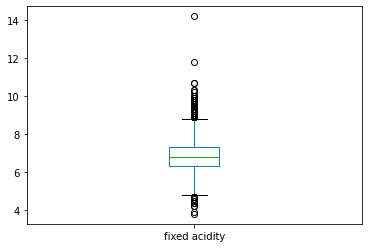

In [126]:
wine['fixed acidity'].plot.box()

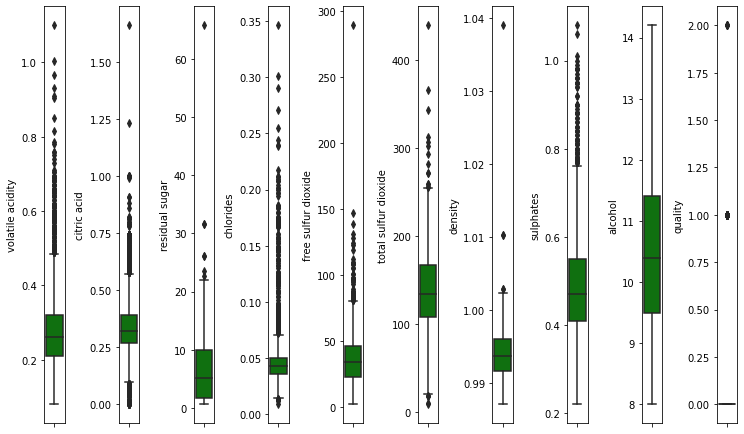

In [127]:
collist=wine.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(wine[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [128]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(wine))
z
threshold=3
np.where(z>3)

(array([  17,   20,   23,   40,   41,   54,   98,  147,  154,  169,  178,
         182,  191,  194,  195,  196,  207,  207,  221,  227,  230,  268,
         269,  271,  294,  296,  315,  325,  325,  339,  358,  372,  395,
         405,  450,  470,  484,  508,  525,  531,  556,  600,  646,  659,
         683,  687,  687,  700,  729,  745,  757,  758,  759,  771,  772,
         774,  775,  820,  821,  827,  852,  854,  859,  866,  873,  876,
         877,  878,  926,  946,  948,  974,  979,  979,  980,  980, 1016,
        1024, 1029, 1034, 1034, 1036, 1040, 1051, 1051, 1053, 1123, 1124,
        1152, 1158, 1163, 1171, 1178, 1180, 1214, 1217, 1217, 1228, 1239,
        1245, 1245, 1254, 1254, 1257, 1263, 1272, 1282, 1293, 1294, 1304,
        1304, 1307, 1309, 1312, 1326, 1369, 1369, 1372, 1373, 1386, 1394,
        1401, 1417, 1418, 1419, 1423, 1423, 1436, 1440, 1445, 1455, 1457,
        1458, 1460, 1465, 1476, 1487, 1488, 1489, 1496, 1504, 1507, 1511,
        1525, 1526, 1530, 1534, 1540, 

In [129]:
wine_new=wine[(z<3).all(axis=1)]
wine_new.shape
wine.shape

(4898, 11)

# Check and removal of distribution of skewness

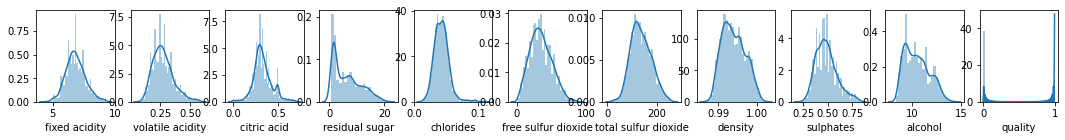

In [130]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(wine_new[collist[i]])

In [131]:
wine_new.skew()

fixed acidity           0.288044
volatile acidity        0.753220
citric acid             0.439470
residual sugar          0.711676
chlorides               1.048331
free sulfur dioxide     0.362603
total sulfur dioxide    0.267259
density                 0.257958
sulphates               0.640965
alcohol                 0.445214
quality                 1.315040
dtype: float64

In [132]:
wine_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,0


In [133]:
x=wine_new.iloc[:,:-1]
y=wine_new.iloc[:,-1]

In [134]:
#removal of skew-ness using log transformation
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [135]:
x.skew()

fixed acidity           0.288044
volatile acidity        0.554507
citric acid             0.439470
residual sugar         -0.022705
chlorides               0.977516
free sulfur dioxide     0.362603
total sulfur dioxide    0.267259
density                 0.257958
sulphates               0.450266
alcohol                 0.445214
dtype: float64

# Let's Build Machine Learning Model

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [137]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [138]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [139]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.8134657836644592
Cross-val-score= 0.7264343902010199


roc_auc_score 0.7361518895094212


              precision    recall  f1-score   support

           0       0.88      0.88      0.88       703
           1       0.58      0.60      0.59       203

    accuracy                           0.81       906
   macro avg       0.73      0.74      0.73       906
weighted avg       0.82      0.81      0.81       906



[[616  87]
 [ 82 121]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


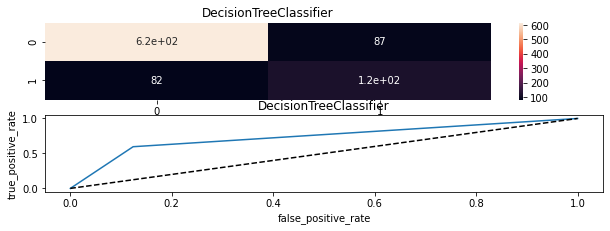

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8719646799116998
Cross-val-score= 0.8000385825079606


roc_auc_score 0.7633365800334948


              precision    recall  f1-score   support

           0       0.88      0.96      0.92       703
           1       0.80      0.57      0.66       203

    accuracy                           0.87       906
   macro avg       0.84      0.76      0.79       906
weighted avg       0.87      0.87      0.86       906



[[675  28]
 [ 88 115]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


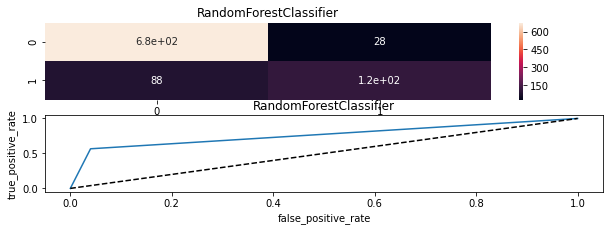

************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.8057395143487859
Cross-val-score= 0.734839027916154


roc_auc_score 0.6978887105928848


              precision    recall  f1-score   support

           0       0.86      0.89      0.88       703
           1       0.58      0.50      0.54       203

    accuracy                           0.81       906
   macro avg       0.72      0.70      0.71       906
weighted avg       0.80      0.81      0.80       906



[[628  75]
 [101 102]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


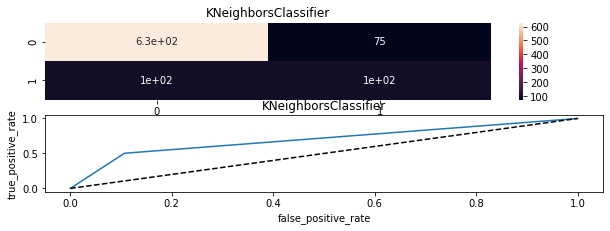

************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.7560706401766004
Cross-val-score= 0.6452064896755163


roc_auc_score 0.6816493703971018


              precision    recall  f1-score   support

           0       0.86      0.82      0.84       703
           1       0.46      0.55      0.50       203

    accuracy                           0.76       906
   macro avg       0.66      0.68      0.67       906
weighted avg       0.77      0.76      0.76       906



[[574 129]
 [ 92 111]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


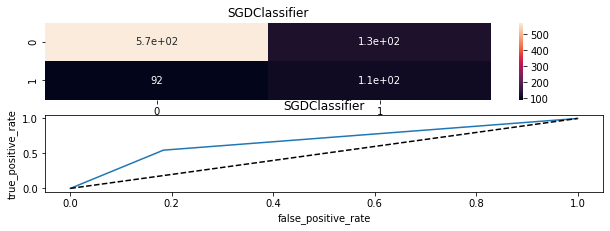

************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.7947019867549668
Cross-val-score= 0.789214968059544


roc_auc_score 0.6119445865362381


              precision    recall  f1-score   support

           0       0.82      0.94      0.88       703
           1       0.59      0.28      0.38       203

    accuracy                           0.79       906
   macro avg       0.70      0.61      0.63       906
weighted avg       0.77      0.79      0.77       906



[[663  40]
 [146  57]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


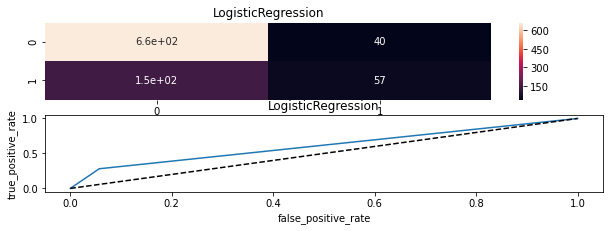

In [140]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed, shuffle =True)
    cv=model_selection.cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    
    
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [141]:
result=pd.DataFrame({'Model': Model, 'cvs': cvs, 'score': score, 'rocscore': rocscore}, columns=['Model', 'cvs', 'score','rocscore'])
result

,Model,cvs,score,rocscore
0,DecisionTreeClassifier,72.643439,81.346578,73.615189
1,RandomForestClassifier,80.003858,87.196468,76.333658
2,KNeighborsClassifier,73.483903,80.573951,69.788871
3,SGDClassifier,64.520649,75.607064,68.164937
4,LogisticRegression,78.921497,79.470199,61.194459


In [142]:
#Random Forest is the best model here
#Let's introduce grid searchCV for parameter tuning
param_grid ={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
rfc = RandomForestClassifier( random_state=1)
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(x_train, y_train)
grid.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.3s
[CV 2/5] END ..................C=0.1, gamma=0.01

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [143]:
grid_predictions=grid.predict(x_test)
grid_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [181]:
rfc.fit(x_train,y_train)
prediction=rfc.predict(x_test)
print('predicted white wine quality:',prediction)
print('actual white wine quality',y_test)

predicted white wine quality: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0

In [145]:
acc=accuracy_score(y_test,grid_predictions)
print('accuracy score',acc)

accuracy score 0.8620309050772627


# Feature Importance

In [146]:
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')


<AxesSubplot:xlabel='feature'>

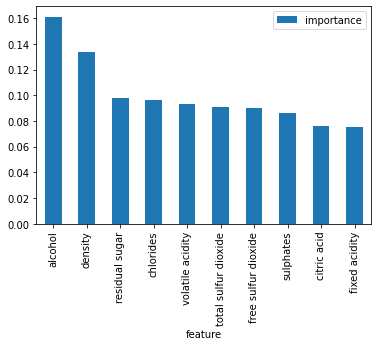

In [147]:
importances.plot.bar()

In [148]:
#Let's Drop free sulfur dioxide and retrain the model
wine.drop('free sulfur dioxide',axis=1,inplace=True)

In [182]:
wine.head()
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,92.0,0.99114,0.50,11.2,0
4894,6.6,0.32,0.36,8.0,0.047,168.0,0.99490,0.46,9.6,0
4895,6.5,0.24,0.19,1.2,0.041,111.0,0.99254,0.46,9.4,0
4896,5.5,0.29,0.30,1.1,0.022,110.0,0.98869,0.38,12.8,1
4897,6.0,0.21,0.38,0.8,0.020,98.0,0.98941,0.32,11.8,0


In [150]:
wine_new=wine[(z<3).all(axis=1)]
wine_new.shape
wine.shape

(4898, 10)

In [151]:
x=wine_new.iloc[:,:-1]
y=wine_new.iloc[:,-1]

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [153]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [154]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

In [155]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.7792494481236203
Cross-val-score= 0.7173841059602648


roc_auc_score 0.6825708259465065


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       703
           1       0.51      0.51      0.51       203

    accuracy                           0.78       906
   macro avg       0.68      0.68      0.68       906
weighted avg       0.78      0.78      0.78       906



[[603 100]
 [100 103]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


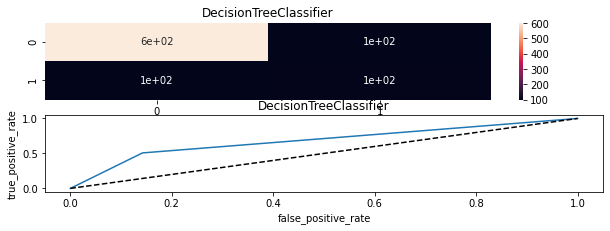

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.8719646799116998
Cross-val-score= 0.7969495399402217


roc_auc_score 0.7650883966673441


              precision    recall  f1-score   support

           0       0.89      0.96      0.92       703
           1       0.80      0.57      0.67       203

    accuracy                           0.87       906
   macro avg       0.84      0.77      0.79       906
weighted avg       0.87      0.87      0.86       906



[[674  29]
 [ 87 116]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


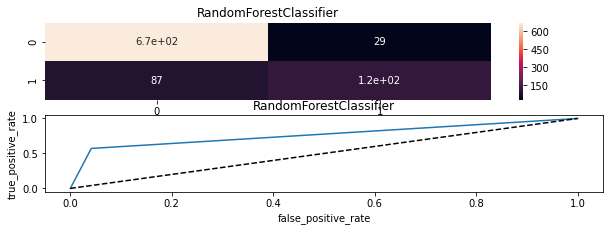

************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.804635761589404
Cross-val-score= 0.7412534919611635


roc_auc_score 0.6954256564056926


              precision    recall  f1-score   support

           0       0.86      0.89      0.88       703
           1       0.57      0.50      0.53       203

    accuracy                           0.80       906
   macro avg       0.72      0.70      0.70       906
weighted avg       0.80      0.80      0.80       906



[[628  75]
 [102 101]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


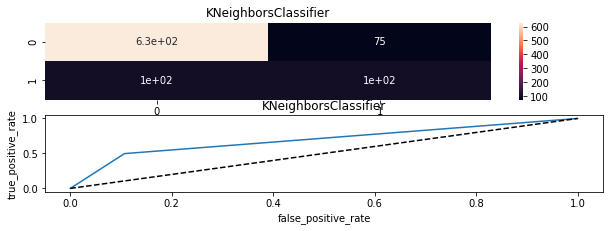

************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.7704194260485652
Cross-val-score= 0.7660058801695676


roc_auc_score 0.6681218423505175


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       703
           1       0.49      0.48      0.49       203

    accuracy                           0.77       906
   macro avg       0.67      0.67      0.67       906
weighted avg       0.77      0.77      0.77       906



[[600 103]
 [105  98]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


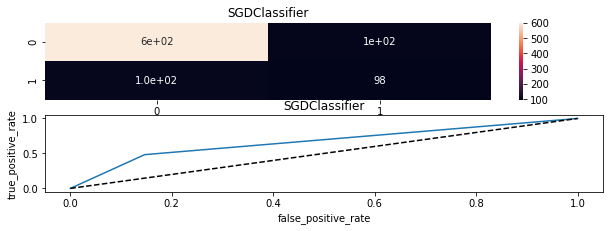

************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.7869757174392936
Cross-val-score= 0.7887715134110843


roc_auc_score 0.5982068404935919


              precision    recall  f1-score   support

           0       0.81      0.94      0.87       703
           1       0.55      0.26      0.35       203

    accuracy                           0.79       906
   macro avg       0.68      0.60      0.61       906
weighted avg       0.76      0.79      0.76       906



[[661  42]
 [151  52]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


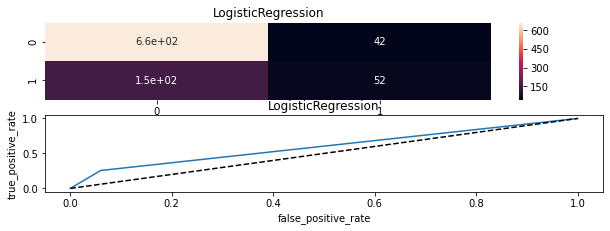

In [156]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed, shuffle =True)
    cv=model_selection.cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    
    
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [157]:
result=pd.DataFrame({'Model': Model, 'cvs': cvs, 'score': score, 'rocscore': rocscore}, columns=['Model', 'cvs', 'score','rocscore'])
result

,Model,cvs,score,rocscore
0,DecisionTreeClassifier,71.738411,77.924945,68.257083
1,RandomForestClassifier,79.694954,87.196468,76.508840
2,KNeighborsClassifier,74.125349,80.463576,69.542566
3,SGDClassifier,76.600588,77.041943,66.812184
4,LogisticRegression,78.877151,78.697572,59.820684


In [187]:
#Random Forest is the best model here
#Let's introduce grid searchCV for parameter tuning
param_grid ={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}
rfc = RandomForestClassifier(random_state=1)
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
model=grid.fit(x_train, y_train)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.7s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.7s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.6s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.6s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   2.8s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.3s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   2.9s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   4.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.1s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   1.5s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   1.9s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   1.6s
[CV 4/5] END ...............

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [189]:
score_grid=[]

grid_predictions=grid.predict(x_test)
grid_predictions
acc_grid=accuracy_score(y_test,grid_predictions)
print('accuracy score',acc_grid)
score_grid.append(acc_grid*100)

accuracy score 0.8520971302428256


In [186]:
#Let's stick with original model

array([[-0.32880153, -0.25868021,  0.32244434,  0.33306447,  0.14806447,
         0.99100144,  0.60648189, -0.577714  , -1.11478866],
       [ 0.16542358,  0.41542603,  0.2254219 , -0.99145636,  1.67053315,
        -0.45105771, -0.7396273 ,  0.1688132 ,  0.11126174],
       [-1.31725175,  0.19072395, -2.68525138, -1.15447431, -0.44400669,
        -2.55504567, -0.54926842, -1.2309253 , -1.11478866],
       [ 0.90676124, -1.04513747,  1.29266877,  0.76098659,  0.9938804 ,
        -0.07281269,  0.94640845, -0.4843981 , -0.54263181],
       [-0.94658291, -0.03397813, -0.4537352 ,  0.67947761, -0.10568031,
        -0.30921583,  0.44331714, -0.577714  , -0.29742173],
       [ 0.65964869,  0.07837291,  0.32244434, -1.09334258, -1.28982262,
        -0.78202211, -1.60304077, -0.8576617 ,  1.50078554]])

In [163]:
rfc.fit(x_train,y_train)
prediction=rfc.predict(x_test)
print('predicted red wine quality:',prediction)
print('actual red wine quality',y_test)

predicted red wine quality: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0

In [164]:
acc=accuracy_score(y_test,grid_predictions)
print('accuracy score',acc)

accuracy score 0.8520971302428256


In [165]:
importances = pd.DataFrame({'feature':x.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')


<AxesSubplot:xlabel='feature'>

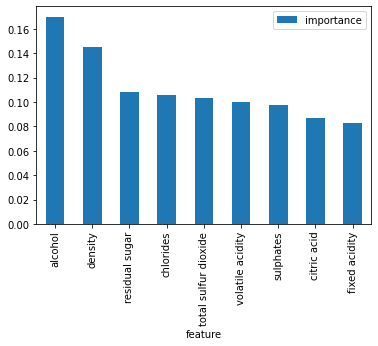

In [166]:
importances.plot.bar()

In [167]:
import pickle


#Let's save the model in a file
file=open('random_forest_classifier_model.pkl', 'wb')# wb=write byte mode
#Dump this file 
pickle.dump(rfc, file)
infile = open('random_forest_classifier_model.pkl','rb')
new_dict = pickle.load(infile, encoding='latin1')


In [180]:
result=new_dict.predict([[7,0.27,0.36,20.7,0.045,170,1.0010,0.45,8.8]])
print(result)

[0]


<AxesSubplot:xlabel='quality'>

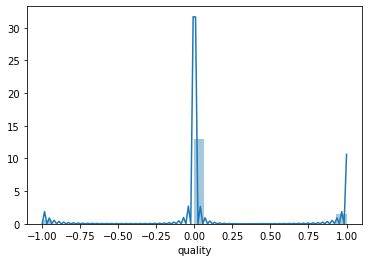

In [174]:
#This the classification model to predict red wine quality
#Check the model performance
sns.distplot(y_test-prediction)

In [ ]:
#This the end-to-end project of White wine quality Classification